# Modelling for prediction

In [37]:
# coding=utf-8
import matplotlib
import sys
reload(sys)
sys.setdefaultencoding('utf-8')
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# Load Machine Learning Libraries:
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Machine Learning Models:

Inputs: 

Semantic value of Tweets: = 1 if positive or = 0 if negative.

Semantic value of Articles: = 1 if positive or = 0 if negative.

Stock price movement = 1 if positive or = 0 if negative.

In [39]:
#load in dataset with final values: don't forget ML input

df = pd.read_csv('Tweets_Articles_StockP_Act2.csv', usecols=[1,4,5,6, 8,9,10], index_col=False)
df.head(20)

,Neg_A_Sentiment,Pos_A_Sentiment,Neg_T_Sentiment,Neut_T_Sentiment,Pos_T_Sentiment,Prediction,Actual
0,0.000,1.000,0.231638,0.491525,0.276836,0,1
1,0.000,1.000,0.112583,0.582781,0.304636,0,0
2,0.000,1.000,0.177419,0.443548,0.379032,1,1
3,0.000,1.000,0.200000,0.400000,0.400000,0,1
4,0.000,1.000,0.174757,0.563107,0.262136,0,1
5,0.000,1.000,0.142857,0.523810,0.333333,1,1
6,0.000,1.000,0.000000,0.000000,0.000000,1,0
7,0.000,1.000,0.000000,0.000000,0.000000,1,1
8,0.000,1.000,0.000000,0.000000,0.000000,1,1
9,0.000,1.000,0.000000,0.000000,0.000000,0,1


In [40]:
#shape
print(df.shape)

In [41]:
#descriptions
print(df.describe())

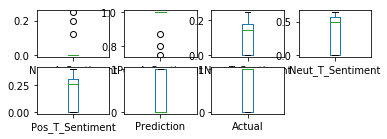

In [42]:
# box and whisker plots
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

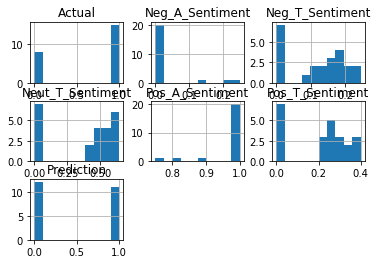

In [43]:
# histograms

df.hist()
plt.show()

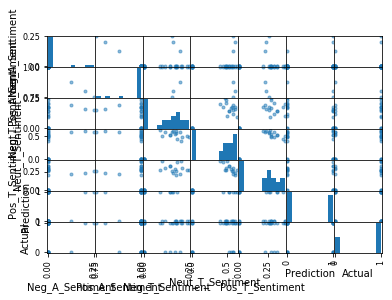

In [44]:
# scatter plot matrix
scatter_matrix(df)
plt.show()

In [45]:
# Split-out validation dataset 
array = df.values
X = array[:,0:6]
Y = array[:,6]
validation_size = 0.31
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [46]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [47]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=6, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

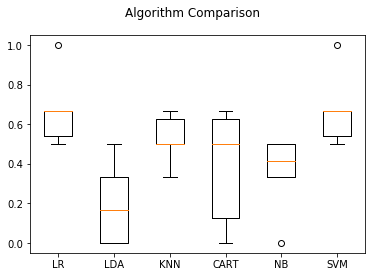

In [48]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# KNN

In [49]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
print"KNN Confusion Matrix"
accuracy_score(Y_validation, predictions)

0.375

# Naive Bayes

In [50]:
# Make predictions on validation dataset
NB = GaussianNB()
NB.fit(X_train, Y_train)
predictions = NB.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
print"NB Confusion Matrix"
accuracy_score(Y_validation, predictions)

0.75

# SVM 

In [51]:
# Make predictions on validation dataset
SVC = SVC()
SVC.fit(X_train, Y_train)
predictions = SVC.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
print"SVM Confusion Matrix"
accuracy_score(Y_validation, predictions)

0.625

# Logistic Regression

In [52]:
# Make predictions on validation dataset
LR = LogisticRegression()
LR.fit(X_train, Y_train)
predictions = LR.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
print"Logistic Regression Confusion Matrix"
accuracy_score(Y_validation, predictions)

0.625

# LDA

In [53]:
# Make predictions on validation dataset
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
predictions = LDA.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
print"LDA Confusion Matrix"
accuracy_score(Y_validation, predictions)

0.375

# CART

In [54]:
# Make predictions on validation dataset
CART = DecisionTreeClassifier()
CART.fit(X_train, Y_train)
predictions = CART.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
print"CART Confusion Matrix"
accuracy_score(Y_validation, predictions)

0.375